In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/lending-club-loan-data/database.sqlite
/kaggle/input/lending-club-loan-data/LCDataDictionary.xlsx
/kaggle/input/lending-club-loan-data/loan.csv


In [2]:
loan = pd.read_csv('../input/lending-club-loan-data/loan.csv',dtype='object')

In [3]:
loan = loan[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'disbursement_method', 'debt_settlement_flag']]

print(loan.shape)

(2260668, 9)


In [4]:
loan.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,C1,Cash,N
1,30000,30000,60 months,18.94,777.23,D,D2,Cash,N
2,5000,5000,36 months,17.97,180.69,D,D1,Cash,N
3,4000,4000,36 months,18.94,146.51,D,D2,Cash,N
4,30000,30000,60 months,16.14,731.78,C,C4,Cash,N


In [5]:
loan.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,disbursement_method,debt_settlement_flag
count,2260668,2260668,2260668,2260668,2260668,2260668,2260668,2260668,2260668
unique,1572,1572,2,673,93296,7,35,2,2
top,10000,10000,36 months,11.99,301.15,B,C1,Cash,N
freq,187236,187146,1609754,53869,4420,663557,145903,2182546,2227612


In [6]:
loan.isnull().values.any()

False

In [7]:
def univariate(df,col,vartype,hue =None): 
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

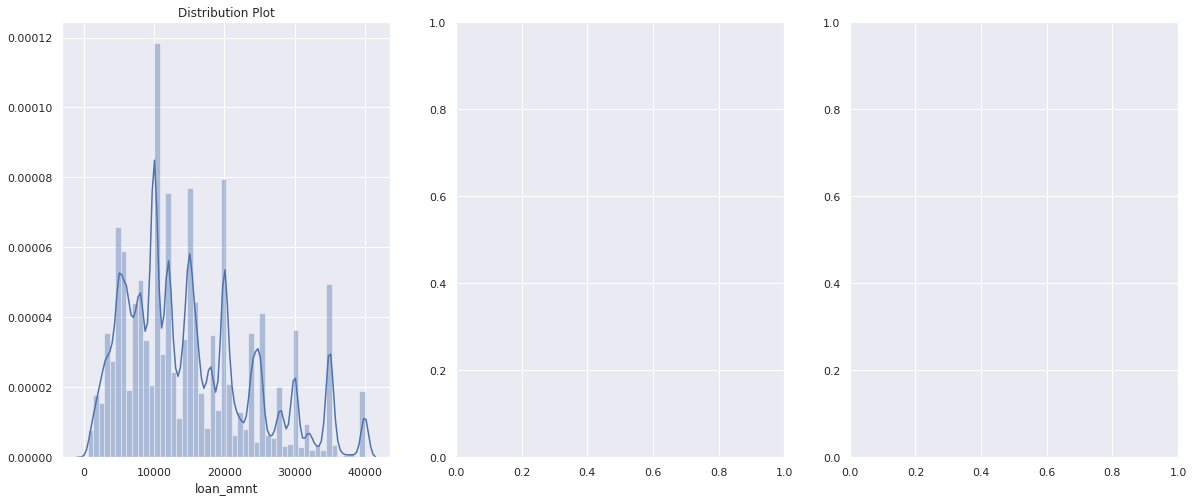

In [8]:
univariate(df=loan,col='loan_amnt',vartype=0)

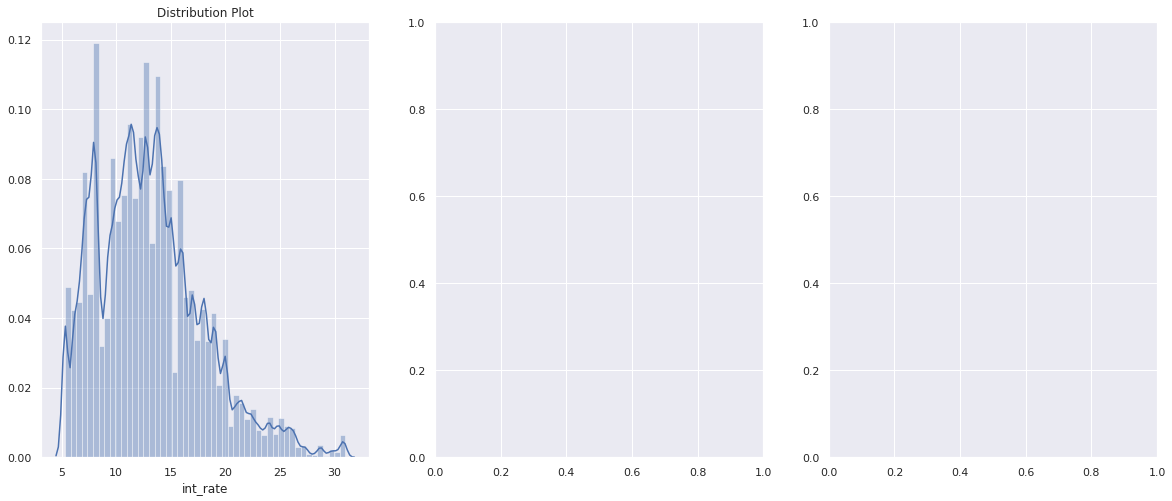

In [9]:
univariate(df=loan,col='int_rate',vartype=0)